# Project 1 : Image Classification using Convolutional Neural Networks

At the end of this project, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

In [1]:
import os
#import kaggle
import shutil

# Descarga del dataset de Kaggle
def download_dataset(dataset_name, output_dir="datasets"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    kaggle.api.dataset_download_files(dataset_name, path=output_dir, unzip=True)
    return os.path.join(output_dir, dataset_name.split("/")[-1])

# Preparar el dataset de animales
dataset_name = "alessiocorrado99/animals10"
dataset_path = "../" #download_dataset(dataset_name)
print(f"Dataset descargado en: {dataset_path}")


Dataset descargado en: ../


In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Función para cargar las imágenes y etiquetas
def load_dataset_as_dataframe(dataset_path, img_size=(64, 64)):
    data = []
    labels = []
    class_mapping = {}
    classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])

    for idx, cls in enumerate(classes):
        class_mapping[cls] = idx
        class_dir = os.path.join(dataset_path, cls)
        
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0
                data.append(img_array)
                labels.append(idx)

            except Exception as e:
                print(f"Error procesando {img_path}: {e}")

    return np.array(data), np.array(labels), class_mapping

In [3]:
import os

data = {
    'original_name': ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 
                      'gatto', 'mucca', 'pecora', 'scoiattolo', 'ragno'],
    'new_name': ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 
                 'cat', 'cow', 'sheep', 'squirrel', 'spider']
}     
class_mapping = pd.DataFrame(data)

# Ruta de la carpeta principal que contiene las subcarpetas por clases
dataset_path = "./kaggle-project/raw-img"

# Renombrar carpetas usando el DataFrame
def rename_folders_from_df(dataset_path, class_mapping):
    for _, row in class_mapping.iterrows():
        original_name = row['original_name']
        new_name = row['new_name']
        
        # Ruta de las carpetas actuales y nuevas
        original_path = os.path.join(dataset_path, original_name)
        new_path = os.path.join(dataset_path, new_name)
        
        # Verificar si la carpeta existe antes de intentar renombrar
        if os.path.isdir(original_path):
            os.rename(original_path, new_path)
            print(f'Renombrado: "{original_name}" a "{new_name}"')
        else:
            print(f'No se encontró la carpeta: "{original_name}"')

rename_folders_from_df(dataset_path, class_mapping)

No se encontró la carpeta: "cane"
No se encontró la carpeta: "cavallo"
No se encontró la carpeta: "elefante"
No se encontró la carpeta: "farfalla"
No se encontró la carpeta: "gallina"
No se encontró la carpeta: "gatto"
No se encontró la carpeta: "mucca"
No se encontró la carpeta: "pecora"
No se encontró la carpeta: "scoiattolo"
No se encontró la carpeta: "ragno"


In [4]:
# Cargar datos
X, y, class_mapping = load_dataset_as_dataframe("./kaggle-project/raw-img")
y_one_hot = to_categorical(y, num_classes=len(class_mapping))

# Dividir datos
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

print(f"Datos cargados. Total imágenes: {X.shape[0]}, Clases: {len(class_mapping)}")

Datos cargados. Total imágenes: 26179, Clases: 10


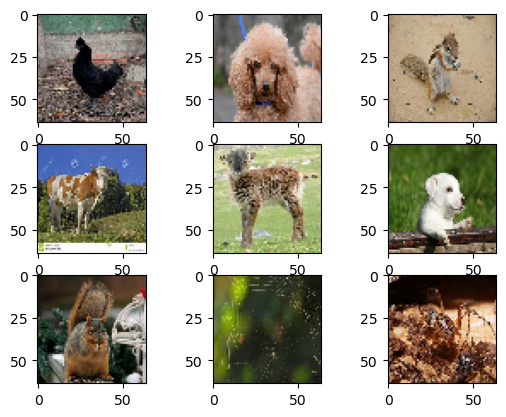

In [5]:
import matplotlib.pyplot as plt

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

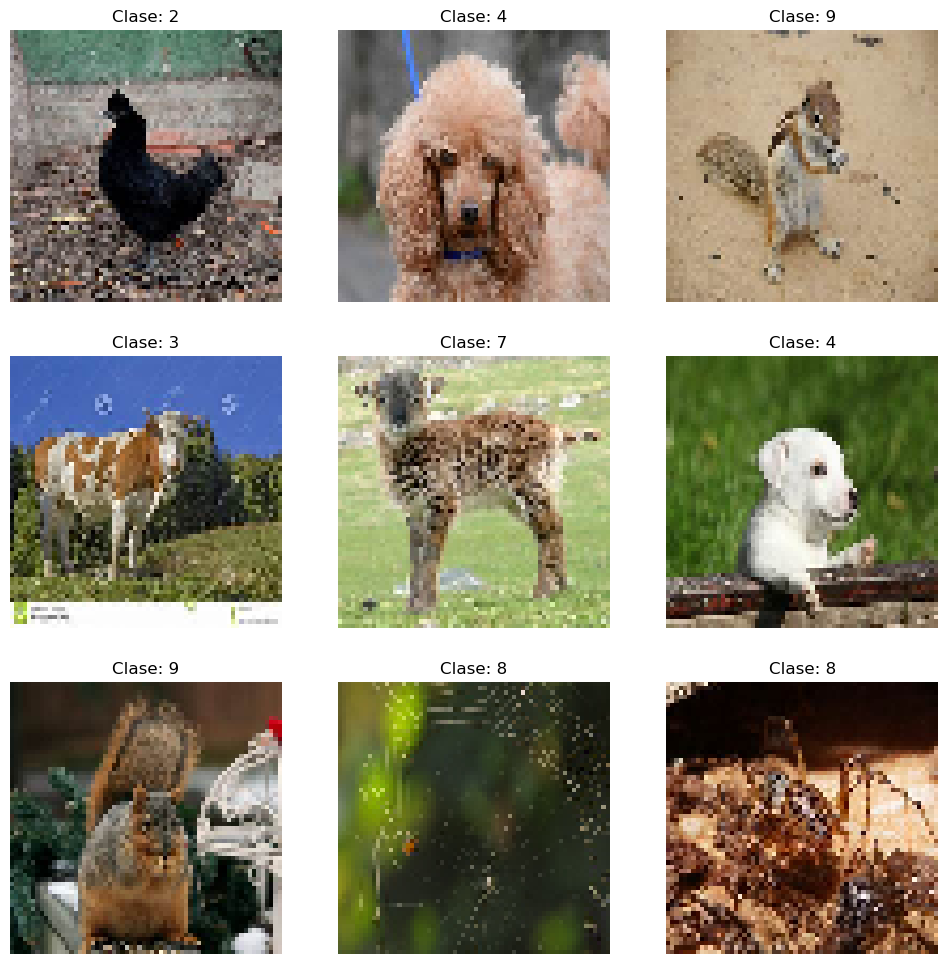

In [6]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Clase: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_cnn_model((64, 64, 3), len(class_mapping))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

c:\Users\Lexo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,551,882 (5.92 MB)

 Trainable params: 1,551,882 (5.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 35s 103ms/step - accuracy: 0.2597 - loss: 2.0849 - val_accuracy: 0.4345 - val_loss: 1.6294
Epoch 2/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 35s 107ms/step - accuracy: 0.4541 - loss: 1.5923 - val_accuracy: 0.5569 - val_loss: 1.3373
Epoch 3/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 36s 110ms/step - accuracy: 0.5435 - loss: 1.3404 - val_accuracy: 0.6029 - val_loss: 1.1758
Epoch 4/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.5794 - loss: 1.2220 - val_accuracy: 0.6245 - val_loss: 1.0955
Epoch 5/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.6289 - loss: 1.1004 - val_accuracy: 0.6641 - val_loss: 1.0167
Epoch 6/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.6586 - loss: 0.9883 - val_accuracy: 0.6748 - val_loss: 0.9638
Epoch 7/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.6892 - loss: 0.8892 - val_accuracy: 0.6837 - val_loss: 0.9460
Epoch 8/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.7272 - loss: 0

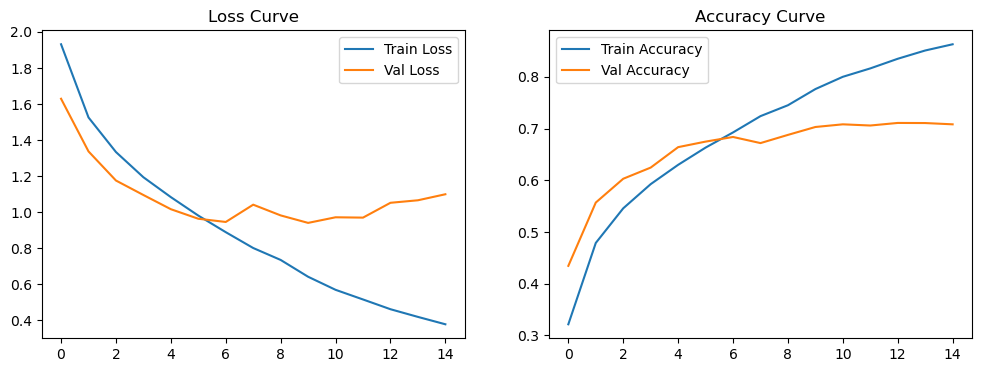

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Entrenar el modelo
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64, callbacks=[early_stopping])

# Visualizar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [9]:
# Evaluación del modelo
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")

164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6997 - loss: 0.9412
Validation Accuracy: 0.70


In [10]:
# Guardar modelo
model.save("animal_classifier.keras")
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Cargar el modelo preentrenado VGG16 sin las capas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Congelar las capas del modelo base para no entrenarlas nuevamente
base_model.trainable = False

In [12]:
transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_mapping), activation='softmax')  # Salida con 10 clases
])

# Compilar el modelo
transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])

transfer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,241,802 (58.14 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
# Aumentacion de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [14]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

In [15]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[early_stopping]
)

Epoch 1/25


c:\Users\Lexo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 101s 304ms/step - accuracy: 0.2627 - loss: 2.1315 - val_accuracy: 0.4513 - val_loss: 1.5976
Epoch 2/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 97s 296ms/step - accuracy: 0.4456 - loss: 1.6216 - val_accuracy: 0.5006 - val_loss: 1.4575
Epoch 3/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 112s 343ms/step - accuracy: 0.4805 - loss: 1.5078 - val_accuracy: 0.5281 - val_loss: 1.3882
Epoch 4/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 122s 372ms/step - accuracy: 0.4983 - loss: 1.4541 - val_accuracy: 0.5424 - val_loss: 1.3442
Epoch 5/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 143s 436ms/step - accuracy: 0.5120 - loss: 1.4130 - val_accuracy: 0.5456 - val_loss: 1.3341
Epoch 6/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 144s 439ms/step - accuracy: 0.5311 - loss: 1.3626 - val_accuracy: 0.5649 - val_loss: 1.3009
Epoch 7/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 127s 388ms/step - accuracy: 0.5350 - loss: 1.3437 - val_accuracy: 0.5730 - val_loss: 1.2722
Epoch 8/25
328/328 ━━━━━━━━━━━━━━━━━━━━ 123s 373ms/step - accuracy: 0.5356 - loss: 1.342

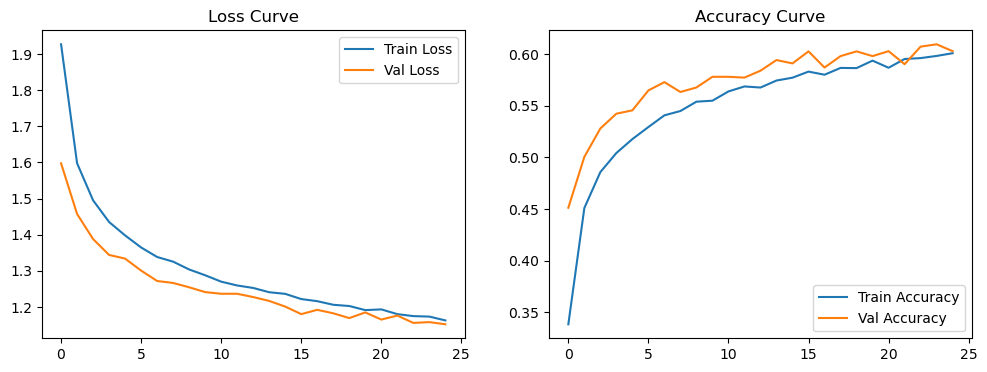

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [17]:
val_loss, val_accuracy = transfer_model.evaluate(X_val, y_val)
print(f"Validation Accuracy with Transfer Learning: {val_accuracy:.2f}")

164/164 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.6473 - loss: 1.0477
Validation Accuracy with Transfer Learning: 0.64


In [18]:
transfer_model.save("animal_classifier_transfer_learning.keras")
print("Modelo ajustado con Transfer Learning guardado exitosamente.")

Modelo ajustado con Transfer Learning guardado exitosamente.


In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.5238 - loss: 1.4705 - val_accuracy: 0.5651 - val_loss: 1.2927
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 65s 199ms/step - accuracy: 0.5612 - loss: 1.2993 - val_accuracy: 0.6045 - val_loss: 1.1835
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 46s 141ms/step - accuracy: 0.5809 - loss: 1.2418 - val_accuracy: 0.6255 - val_loss: 1.1238
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 48s 147ms/step - accuracy: 0.5952 - loss: 1.2061 - val_accuracy: 0.5772 - val_loss: 1.2398
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 54s 165ms/step - accuracy: 0.6022 - loss: 1.1873 - val_accuracy: 0.6415 - val_loss: 1.0708
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 48s 146ms/step - accuracy: 0.6181 - loss: 1.1239 - val_accuracy: 0.6421 - val_loss: 1.0656
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 51s 156ms/step - accuracy: 0.6331 - loss: 1.1037 - val_accuracy: 0.6448 - val_loss: 1.0935
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step - accuracy: 0.6361 - loss: 1